# Preprocessing New Mexico Regulatory data for WaDE upload.
- Purpose:  To preprocess the New Mexico data into one master file for simple DataFrame creation and extraction.

In [1]:
#Needed Libararies

# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd

# visulizaiton
import matplotlib.pyplot as plt
import seaborn as sns

# API retrieval
import requests
import json

# Cleanup
import re
from datetime import date
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in Pandas

In [2]:
# Working Directory
workingDir = "G:/Shared drives/WaDE Data/NewMexico/Regulatory/RawInputData"
os.chdir(workingDir)

## Interstate Stream Compact Regions

In [3]:
# Input File - OSEWaterRightDistrictBoundary_input.csv
df_iscr = pd.read_csv('Interstate Stream Compact Regions/InterstateStreamCompactRegions_input.zip', compression='zip')

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in df_iscr:
    df_iscr['WaDEUUID'] = "nmiscr" + df_iscr.index.astype(str)
    df_iscr.to_csv('Interstate Stream Compact Regions/InterstateStreamCompactRegions_input.zip', compression=dict(method='zip', archive_name='InterstateStreamCompactRegions_input.csv'), index=False)

print(len(df_iscr))
df_iscr.head(1)

8


,OID_,EffectiveDate,RegulatoryDescription,Full_Name,States,Source,Compact_Na,URL,Shape__Are,Shape__Len,Shape_Length,Shape_Area,WaDEUUID
0,1,1946,The compact provides for the delivery of appor...,Costilla Creek Compact,"CO,NM",NHD HUC10,CCC,http://www.ose.state.nm.us/Compacts/CostillaCr...,0.06555,1.77274,1.77274,0.06555,nmiscr0


In [4]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = df_iscr['WaDEUUID']

# Date Info
df['in_Date'] = date.today().strftime('%m/%d')
df['in_Year'] = date.today().strftime('%Y')

# Organization
df['in_OrganizationUUID'] = "NMwr_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = df_iscr['Full_Name']
#df['in_ReportingUnitNativeID'] = "ISCR" + df_iscr['OID_'].replace("", 0).fillna(0).astype(int).astype(str)
df['in_ReportingUnitNativeID'] = "ISCR" + df_iscr.index.fillna(0).astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Interstate River Compact"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "NM"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "WaDE Unspecfied"
df['in_RegulatoryDescription'] = df_iscr['RegulatoryDescription']
df['in_RegulatoryName'] = df_iscr['Full_Name']
df['in_RegulatoryOverlayNativeID'] = "ISCR" # make custom below
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = df_iscr['URL']
df['in_StatutoryEffectiveDate'] = df_iscr['EffectiveDate']
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Interstate River Compact"
df['in_WaterSourceTypeCV'] = "Surface Water"


df = df.drop_duplicates().reset_index(drop=True)
outdf_iscr = df.copy()
print(len(outdf_iscr))
outdf_iscr.head()

8


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,nmiscr0,05/02,2023,NMwr_O1,4326,Costilla Creek Compact,ISCR0,,Interstate River Compact,,NM,,WaDE Unspecfied,The compact provides for the delivery of appor...,Costilla Creek Compact,ISCR,Active,,http://www.ose.state.nm.us/Compacts/CostillaCr...,1946,,Interstate River Compact,Surface Water
1,nmiscr1,05/02,2023,NMwr_O1,4326,Animas-La Plata Project Compact,ISCR1,,Interstate River Compact,,NM,,WaDE Unspecfied,It establishes equal priority for the water su...,Animas-La Plata Project Compact,ISCR,Active,,http://www.ose.state.nm.us/Compacts/AnimasLaPl...,1968,,Interstate River Compact,Surface Water
2,nmiscr2,05/02,2023,NMwr_O1,4326,La Plata River Compact,ISCR2,,Interstate River Compact,,NM,,WaDE Unspecfied,The compact also provides cooperative collecti...,La Plata River Compact,ISCR,Active,,http://www.ose.state.nm.us/Compacts/LaPlata/is...,1925,,Interstate River Compact,Surface Water
3,nmiscr3,05/02,2023,NMwr_O1,4326,Upper Colorado River Basin Compact,ISCR3,,Interstate River Compact,,NM,,WaDE Unspecfied,The compact creates the Upper Colorado River C...,Upper Colorado River Basin Compact,ISCR,Active,,http://www.ose.state.nm.us/Compacts/UpperColor...,1948,,Interstate River Compact,Surface Water
4,nmiscr4,05/02,2023,NMwr_O1,4326,Pecos River Compact,ISCR4,,Interstate River Compact,,NM,,WaDE Unspecfied,The compact creates the Pecos River Commission...,Pecos River Compact,ISCR,Active,,http://www.ose.state.nm.us/Compacts/Pecos/isc_...,1948,,Interstate River Compact,Surface Water


## OSE Water Right District Boundary

In [5]:
# Input File - OSEWaterRightDistrictBoundary_input.csv
df_ose = pd.read_csv('OSE Water Right District Boundary/OSEWaterRightDistrictBoundary_input.csv')

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in df_ose:
    df_ose['WaDEUUID'] = "nmiscr" + df_ose.index.astype(str)
    df_ose.to_csv('OSE Water Right District Boundary/OSEWaterRightDistrictBoundary_input.csv', index=False)

print(len(df_ose))
df_ose.head(1)

7


,OID_,EffectiveDate,ose_dist_i,name,dist_nbr,Shape__Are,Shape__Len,Designatio,Address,URL,MeterReadi,WaDEUUID
0,0,1946,7,Cimarron,7,43861758004,983128.20280,District 7,301 East 9th Street,https://www.ose.state.nm.us/DO/district_7.php,https://www.ose.state.nm.us/Meter/meterContact...,nmiscr0


In [6]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = df_ose['WaDEUUID']

# Date Info
df['in_Date'] = date.today().strftime('%m/%d')
df['in_Year'] = date.today().strftime('%Y')

# Organization
df['in_OrganizationUUID'] = "NMwr_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = df_ose['name']
df['in_ReportingUnitNativeID'] = "OSEWRB" + df_ose['ose_dist_i'].replace("", 0).fillna(0).astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Water Rights District"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "NM"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "WaDE Unspecfied"
df['in_RegulatoryDescription'] = "District operated by a Water Master appointed by the Office of the State Engineer, who is charged with administering the state's water resources. The State Engineer has authority over the supervision, measurement, appropriation, and distribution of all surface and groundwater in New Mexico, including streams and rivers that cross state boundaries."
df['in_RegulatoryName'] = df_ose['name']
df['in_RegulatoryOverlayNativeID'] = "OSEWR" # make custom below
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = df_ose['URL']
df['in_StatutoryEffectiveDate'] = "08/12/2021"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Water Rights District"
df['in_WaterSourceTypeCV'] = "Surface Water and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf_ose = df.copy()
print(len(outdf_ose))
outdf_ose.head()

7


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,nmiscr0,05/02,2023,NMwr_O1,4326,Cimarron,OSEWRB7,,Water Rights District,,NM,,WaDE Unspecfied,District operated by a Water Master appointed ...,Cimarron,OSEWR,Active,,https://www.ose.state.nm.us/DO/district_7.php,08/12/2021,,Water Rights District,Surface Water and Groundwater
1,nmiscr1,05/02,2023,NMwr_O1,4326,Santa Fe,OSEWRB6,,Water Rights District,,NM,,WaDE Unspecfied,District operated by a Water Master appointed ...,Santa Fe,OSEWR,Active,,https://www.ose.state.nm.us/DO/district_6.php,08/12/2021,,Water Rights District,Surface Water and Groundwater
2,nmiscr2,05/02,2023,NMwr_O1,4326,Aztec,OSEWRB5,,Water Rights District,,NM,,WaDE Unspecfied,District operated by a Water Master appointed ...,Aztec,OSEWR,Active,,https://www.ose.state.nm.us/DO/district_5.php,08/12/2021,,Water Rights District,Surface Water and Groundwater
3,nmiscr3,05/02,2023,NMwr_O1,4326,Las Cruces,OSEWRB4,,Water Rights District,,NM,,WaDE Unspecfied,District operated by a Water Master appointed ...,Las Cruces,OSEWR,Active,,https://www.ose.state.nm.us/DO/district_4.php,08/12/2021,,Water Rights District,Surface Water and Groundwater
4,nmiscr4,05/02,2023,NMwr_O1,4326,Deming,OSEWRB3,,Water Rights District,,NM,,WaDE Unspecfied,District operated by a Water Master appointed ...,Deming,OSEWR,Active,,https://www.ose.state.nm.us/DO/district_3.php,08/12/2021,,Water Rights District,Surface Water and Groundwater


## Special Conditions Water Right

In [7]:
# Input File - SpecialConditionsWaterRight_input.csv
df_scwr = pd.read_csv("Special Conditions Water Right Regulations/SpecialConditionsWaterRight_input.csv", encoding = "ISO-8859-1")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in df_scwr:
    df_scwr['WaDEUUID'] = "nmscwr" + df_scwr.index.astype(str)
    df_scwr.to_csv('Special Conditions Water Right Regulations/SpecialConditionsWaterRight_input.csv', index=False)

print(len(df_scwr))
df_scwr.head(1)

194


,OID_,OversightAgency,Name,reg_type,geologic_u,doc_refere,requiremen,source_doc,created_da,effect_dat,modified_d,Meters,estd_purpo,dom_well_l,well_limit,acres,alt_name,jurisdicti,district_o,OSE_Distri,Legal_Desc,Disclaimer,GlobalID,Shape__Are,Shape__Len,WaDEUUID
0,0,1946.00000,McGaffey and Main Ground Water Management Area,QRA,Alluvial Aquifer,NMED Temporary Well Drilling Moratorium - McGa...,Restrict permitting of new wells except for EP...,NMED,5/10/2016 0:00,5/21/2016 0:00,12/20/2017 0:00,Y,To protect human health,N,N,3611.33597,McGaffey Superfund Site,NMED,ROW,District 2,33Â°23Â00.90ÂN 104Â°31Â44.00ÂW S Lea Ave...,Reasonable efforts have been made by the New M...,{efc85caa-f118-44cd-8eef-a48967a60a63},14614558.14000,16348.51206,nmscwr0


In [8]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = df_scwr['WaDEUUID']

# Date Info
df['in_Date'] = date.today().strftime('%m/%d')
df['in_Year'] = date.today().strftime('%Y')

# Organization
df['in_OrganizationUUID'] = "NMwr_O1"

# # ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = df_scwr['Name']
#df['in_ReportingUnitNativeID'] = "SCWR" + df_scwr['OID_'].replace("", 0).fillna(0).astype(int).astype(str)
df['in_ReportingUnitNativeID'] = "SCWR" + df_scwr.index.fillna(0).astype(int).astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Special Condition Water Right"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "NM"
df['in_Geometry'] = ""

# # RegulatoryOverlay Info
df['in_OversightAgency'] = "WaDE Unspecified"
df['in_RegulatoryDescription'] = df_scwr['requiremen']
df['in_RegulatoryName'] = df_scwr['Name']
df['in_RegulatoryOverlayNativeID'] = "SCWR" # make custom below
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] = "WaDE Unspecified"
df['in_StatutoryEffectiveDate'] = df_scwr['effect_dat']
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Special Condition Water Right"
df['in_WaterSourceTypeCV'] = "Surface Water and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf_scwr = df.copy()
print(len(outdf_scwr))
outdf_scwr.head()

194


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,nmscwr0,05/02,2023,NMwr_O1,4326,McGaffey and Main Ground Water Management Area,SCWR0,,Special Condition Water Right,,NM,,WaDE Unspecified,Restrict permitting of new wells except for EP...,McGaffey and Main Ground Water Management Area,SCWR,Active,,WaDE Unspecified,5/21/2016 0:00,,Special Condition Water Right,Surface Water and Groundwater
1,nmscwr1,05/02,2023,NMwr_O1,4326,City of Rio Rancho Ordinance 59,SCWR1,,Special Condition Water Right,,NM,,WaDE Unspecified,City will issue permit for new dom well with O...,City of Rio Rancho Ordinance 59,SCWR,Active,,WaDE Unspecified,9/19/2006 0:00,,Special Condition Water Right,Surface Water and Groundwater
2,nmscwr2,05/02,2023,NMwr_O1,4326,Taos Town limits 2013,SCWR2,,Special Condition Water Right,,NM,,WaDE Unspecified,No new 72-12-1 wells to be drilled within Taos...,Taos Town limits 2013,SCWR,Active,,WaDE Unspecified,3/25/2003 0:00,,Special Condition Water Right,Surface Water and Groundwater
3,nmscwr3,05/02,2023,NMwr_O1,4326,Taos - 72-12-1 wells allowed - 2013,SCWR3,,Special Condition Water Right,,NM,,WaDE Unspecified,"Currently allows new 72-12-1, not annexed. ma...",Taos - 72-12-1 wells allowed - 2013,SCWR,Active,,WaDE Unspecified,3/25/2003 0:00,,Special Condition Water Right,Surface Water and Groundwater
4,nmscwr4,05/02,2023,NMwr_O1,4326,Santa Fe Domestic Well Ordinance,SCWR4,,Special Condition Water Right,,NM,,WaDE Unspecified,Authorization from the City of Santa Fe must b...,Santa Fe Domestic Well Ordinance,SCWR,Active,,WaDE Unspecified,1/28/2014 0:00,,Special Condition Water Right,Surface Water and Groundwater


## Clean Data and Concatenate DataFrames together into single output

In [9]:
# make custom in_RegulatoryOverlayNativeID

outdf_iscr['in_RegulatoryOverlayNativeID'] = outdf_iscr['in_RegulatoryOverlayNativeID'].astype(str) + outdf_iscr.index.astype(str)
outdf_ose['in_RegulatoryOverlayNativeID'] = outdf_ose['in_RegulatoryOverlayNativeID'].astype(str) + outdf_ose.index.astype(str)
outdf_scwr['in_RegulatoryOverlayNativeID'] = outdf_scwr['in_RegulatoryOverlayNativeID'].astype(str) + outdf_scwr.index.astype(str)

In [10]:
# Concatenate Subbasin DataFrames
frames = [outdf_iscr, outdf_ose, outdf_scwr]
outdf = pd.concat(frames)
print(len(outdf))
outdf.head(1)

209


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,nmiscr0,05/02,2023,NMwr_O1,4326,Costilla Creek Compact,ISCR0,,Interstate River Compact,,NM,,WaDE Unspecfied,The compact provides for the delivery of appor...,Costilla Creek Compact,ISCR0,Active,,http://www.ose.state.nm.us/Compacts/CostillaCr...,1946,,Interstate River Compact,Surface Water


In [11]:
# Fixing empty string names
def fixEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or pd.isnull(val):
        outString = "WaDE Unspecified"
    else:
        outString = val
    return outString

In [12]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: fixEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['McGaffey and Main Ground Water Management Area',
       'City of Rio Rancho Ordinance 59', 'Taos Town limits 2013',
       'Taos - 72-12-1 wells allowed - 2013',
       'Santa Fe Domestic Well Ordinance', 'Estancia Basin CMA',
       'Estancia Poor Quality Area', 'Roswell CMA',
       'San Simon Restrictions', 'MRG Administrative Area',
       'La Luz-Fresnal-Laborcita Watershed CMA Domestic Well Order',
       'San Mateo Creek Health Advisory',
       'Curry-Portales Underground Water Basins', 'Albuquerque CMA',
       'AT&SF ABQ Superfund Site',
       'City of E.B. Domestic well restrictions',
       'NPT Domestic Well Stipulation',
       'Grants Chlorinated Solvents Plume', 'Truth or Consequences',
       'Jal Basin', 'Old Gulton Industries Site',
       'North Railroad Avenue Plume', 'Village of Taos Ski Valley',
       'Griggs & Walnut GW Plume Superfund Site',
       'Village of Questa Ordinance 24',
       'Alamogordo-Tularosa Administrative Area',
       'Alamogordo-T

In [13]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: fixEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Restrict permitting of new wells except for EPA and NMED in order to protect human health and prevent interference with planned groundwater remediation',
       'City will issue permit for new dom well with OSE approval',
       'No new 72-12-1 wells to be drilled within Taos Town Limits - wtihin 300 ft of water line, no permitting within boundary without documentation from city.',
       'Currently allows new 72-12-1, not annexed.  may be limited in the future.',
       'Authorization from the City of Santa Fe must be obtained for 72-12-1 domestic well application for permit',
       'No new appropriations from NMSA 72-12-3 wells, NMSA 72-12-1 wells limited to 0.5 acre ft. per annum.',
       'Restricted access to the upper or first water zone requires condition 2.',
       'No new applications for groundwater or surface water except NMSA 72-12-1 wells.',
       'One household, not to exceed 0.6 acre-feet per annum diversion and 0.17 acre-feet per annum consumptive use on not 

In [14]:
outdf['in_RegulatoryName'] = df.apply(lambda row: fixEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['McGaffey and Main Ground Water Management Area',
       'City of Rio Rancho Ordinance 59', 'Taos Town limits 2013',
       'Taos - 72-12-1 wells allowed - 2013',
       'Santa Fe Domestic Well Ordinance', 'Estancia Basin CMA',
       'Estancia Poor Quality Area', 'Roswell CMA',
       'San Simon Restrictions', 'MRG Administrative Area',
       'La Luz-Fresnal-Laborcita Watershed CMA Domestic Well Order',
       'San Mateo Creek Health Advisory',
       'Curry-Portales Underground Water Basins', 'Albuquerque CMA',
       'AT&SF ABQ Superfund Site',
       'City of E.B. Domestic well restrictions',
       'NPT Domestic Well Stipulation',
       'Grants Chlorinated Solvents Plume', 'Truth or Consequences',
       'Jal Basin', 'Old Gulton Industries Site',
       'North Railroad Avenue Plume', 'Village of Taos Ski Valley',
       'Griggs & Walnut GW Plume Superfund Site',
       'Village of Questa Ordinance 24',
       'Alamogordo-Tularosa Administrative Area',
       'Alamogordo-T

In [15]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['1970-01-01T00:00:00.000000000', '2021-08-12T00:00:00.000000000',
       '2016-05-21T00:00:00.000000000', '2006-09-19T00:00:00.000000000',
       '2003-03-25T00:00:00.000000000', '2014-01-28T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2005-02-10T00:00:00.000000000',
       '1960-10-20T00:00:00.000000000', '2000-09-13T00:00:00.000000000',
       '2002-12-03T00:00:00.000000000', '2008-12-19T00:00:00.000000000',
       '2010-06-02T00:00:00.000000000', '2000-09-22T00:00:00.000000000',
       '2009-01-29T00:00:00.000000000', '2008-08-01T00:00:00.000000000',
       '2017-09-12T00:00:00.000000000', '2012-09-14T00:00:00.000000000',
       '1992-08-02T00:00:00.000000000', '2013-01-25T00:00:00.000000000',
       '2003-01-30T00:00:00.000000000', '2001-07-13T00:00:00.000000000',
       '2003-11-18T00:00:00.000000000', '2011-10-13T00:00:00.000000000',
       '1996-09-23T00:00:00.000000000', '1997-05-01T00:00:00.000000000',
       '2017-02-07T00:00:00.000000000', '2014-11-24

# Shapefile Data

#### Interstate Stream Compact Regions

In [16]:
ISCRShapeFile = "Interstate Stream Compact Regions/shapefile/InterstateStreamCompactRegions.zip"
ISCRShape = gpd.read_file(ISCRShapeFile)
print(len(ISCRShape))
ISCRShape.head(1)

8


,States,Source,Compact_Na,URL,Shape__Are,Shape__Len,Full_Name,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,"CO,NM",NHD HUC10,CCC,http://www.ose.state.nm.us/Compacts/CostillaCr...,0.06555,1.77274,Costilla Creek Compact,1.77274,1.77274,0.06555,"POLYGON ((-105.50932 36.99594, -105.49790 36.9..."


<AxesSubplot: >

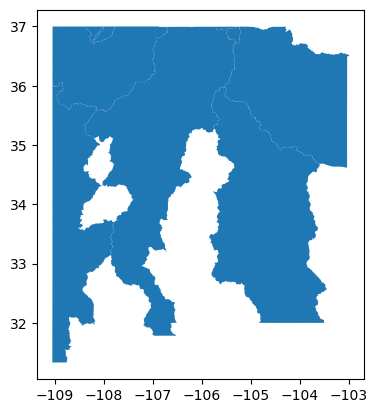

In [17]:
ISCRShape.plot()

In [18]:
# Interstate Stream Compact Regions
columnsList = ['in_SiteNativeID', 'geometry']
df_ISCR_shp = pd.DataFrame(columns=columnsList, index=ISCRShape.index)

df_ISCR_shp['in_ReportingUnitNativeID'] = "ISCR" + ISCRShape.index.fillna(0).astype(int).astype(str)
df_ISCR_shp['geometry'] = ISCRShape['geometry']
df_ISCR_shp = df_ISCR_shp.drop_duplicates().reset_index(drop=True)
print(len(df_ISCR_shp))
df_ISCR_shp.head(3)

8


,in_SiteNativeID,geometry,in_ReportingUnitNativeID
0,NaN,"POLYGON ((-105.50932 36.99594, -105.49790 36.9...",ISCR0
1,NaN,"POLYGON ((-107.78857 36.99880, -107.78894 36.9...",ISCR1
2,NaN,"POLYGON ((-107.98854 36.99907, -107.98859 36.9...",ISCR2


#### OSE Water Right District Boundary

In [19]:
EWRDhapeFile = "OSE Water Right District Boundary/shapefile/OSEWaterRightDistrictBoundary.shp"
EWRDShape = gpd.read_file(EWRDhapeFile)
print(len(EWRDShape))
EWRDShape.head(1)

7


,ose_dist_i,name,dist_nbr,Shape__Are,Shape__Len,Designatio,Address,URL,MeterReadi,Shape_Leng,Shape_Area,geometry
0,7,Cimarron,7,43861758003.50000,983128.20285,District 7,301 East 9th Street,https://www.ose.state.nm.us/DO/district_7.php,https://www.ose.state.nm.us/Meter/meterContact...,9.90923,4.38841,"POLYGON ((-103.04271 34.95415, -103.04481 34.9..."


<AxesSubplot: >

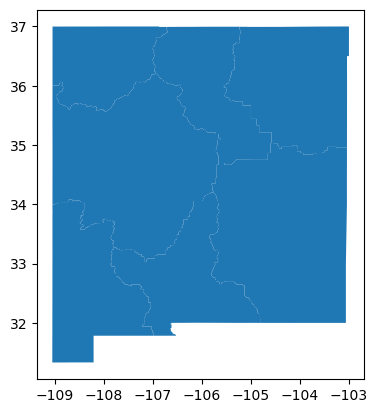

In [20]:
EWRDShape.plot()

In [21]:
# OSE Water Right District Boundary
columnsList = ['in_SiteNativeID', 'geometry']
df_EWRD_shp = pd.DataFrame(columns=columnsList, index=EWRDShape.index)

df_EWRD_shp['in_ReportingUnitNativeID'] = "OSEWRB" + EWRDShape['ose_dist_i'].replace("", 0).fillna(0).astype(int).astype(str)
df_EWRD_shp['geometry'] = EWRDShape['geometry']
df_EWRD_shp = df_EWRD_shp.drop_duplicates().reset_index(drop=True)
print(len(df_EWRD_shp))
df_EWRD_shp.head(3)

7


,in_SiteNativeID,geometry,in_ReportingUnitNativeID
0,NaN,"POLYGON ((-103.04271 34.95415, -103.04481 34.9...",OSEWRB7
1,NaN,"POLYGON ((-106.58568 36.99298, -106.56312 36.9...",OSEWRB6
2,NaN,"POLYGON ((-107.01495 37.00002, -107.00354 37.0...",OSEWRB5


#### Special Conditoins Water Right

In [22]:
SCWRShapeFile = "Special Conditions Water Right Regulations/shapefile/SpecialConditionsWaterRightRegulations.shp"
SCWRShape = gpd.read_file(SCWRShapeFile)
print(len(SCWRShape))
SCWRShape.head(1)

194


,Name,reg_type,geologic_u,doc_refere,requiremen,source_doc,created_da,effect_dat,modified_d,Meters,estd_purpo,dom_well_l,well_limit,acres,alt_name,jurisdicti,district_o,OSE_Distri,Legal_Desc,Disclaimer,GlobalID,Shape__Are,Shape__Len,RegUUID,Shape_Leng,Shape_Area,geometry
0,McGaffey and Main Ground Water Management Area,QRA,Alluvial Aquifer,NMED Temporary Well Drilling Moratorium - McGa...,Restrict permitting of new wells except for EP...,NMED,2016-05-10,2016-05-21,2017-12-20,Y,To protect human health,N,N,3611.33597,McGaffey Superfund Site,NMED,ROW,District 2,33°23’00.90”N 104°31’44.00”W S Lea Ave & W S...,Reasonable efforts have been made by the New M...,{efc85caa-f118-44cd-8eef-a48967a60a63},14614558.14450,16348.51206,None,0.13508,0.00098,"POLYGON ((-104.50837 33.38337, -104.48336 33.3..."


<AxesSubplot: >

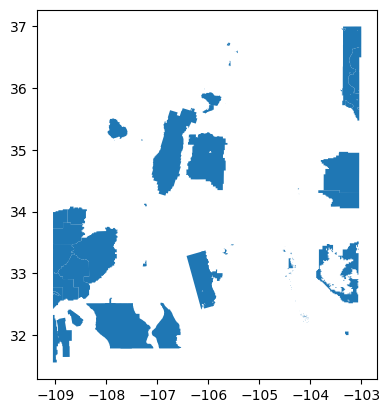

In [23]:
SCWRShape.plot()

In [24]:
# Special Conditoins Water Right
columnsList = ['in_SiteNativeID', 'geometry']
df_SCWR_shp = pd.DataFrame(columns=columnsList, index=SCWRShape.index)

df_SCWR_shp['in_ReportingUnitNativeID'] = "SCWR" + SCWRShape.index.fillna(0).astype(int).astype(str)
df_SCWR_shp['geometry'] = SCWRShape['geometry']
df_SCWR_shp = df_SCWR_shp.drop_duplicates().reset_index(drop=True)
print(len(df_SCWR_shp))
df_SCWR_shp.head(3)

194


,in_SiteNativeID,geometry,in_ReportingUnitNativeID
0,NaN,"POLYGON ((-104.50837 33.38337, -104.48336 33.3...",SCWR0
1,NaN,"POLYGON ((-106.70761 35.39285, -106.70769 35.3...",SCWR1
2,NaN,"POLYGON ((-105.57094 36.42107, -105.57075 36.4...",SCWR2


In [25]:
# Concatenate Basin & Subbasin DataFrames
frames = [df_ISCR_shp, df_EWRD_shp, df_SCWR_shp]
df_shape_out = pd.concat(frames).reset_index(drop=True)

print(len(df_shape_out))
df_shape_out

209


,in_SiteNativeID,geometry,in_ReportingUnitNativeID
0,NaN,"POLYGON ((-105.50932 36.99594, -105.49790 36.9...",ISCR0
1,NaN,"POLYGON ((-107.78857 36.99880, -107.78894 36.9...",ISCR1
2,NaN,"POLYGON ((-107.98854 36.99907, -107.98859 36.9...",ISCR2
3,NaN,"POLYGON ((-106.87644 37.00000, -106.87500 36.9...",ISCR3
4,NaN,"POLYGON ((-105.53698 35.97272, -105.53606 35.9...",ISCR4
...,...,...,...
204,NaN,"POLYGON ((-104.13311 32.29074, -104.13310 32.2...",SCWR189
205,NaN,"POLYGON ((-104.12885 32.29072, -104.12884 32.2...",SCWR190
206,NaN,"POLYGON ((-107.63084 32.16756, -107.63292 32.1...",SCWR191
207,NaN,"MULTIPOLYGON (((-105.78726 34.37446, -105.7873...",SCWR192


### Inspect Output Data & Export

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_shape_out.dtypes)

in_SiteNativeID               object
geometry                    geometry
in_ReportingUnitNativeID      object
dtype: object


In [28]:
# Export out to CSV.
outdf.to_csv('Pre_nmMain.zip', compression=dict(method='zip', archive_name='Pre_nmMain.csv'), index=False)  # The output, save as a zip
df_shape_out.to_csv('P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.